# EX1:

In [38]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/W2/dataset.csv')
df

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = df.values
data.shape

(20, 3)

In [41]:
N, d = data.shape
x = data[:, :d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

In [42]:
data

array([[10.  ,  1.  ,  1.  ],
       [ 5.  ,  2.  ,  1.  ],
       [ 6.  ,  1.8 ,  1.  ],
       [ 7.  ,  1.  ,  1.  ],
       [ 8.  ,  2.  ,  1.  ],
       [ 9.  ,  0.5 ,  1.  ],
       [ 4.  ,  3.  ,  1.  ],
       [ 5.  ,  2.5 ,  1.  ],
       [ 8.  ,  1.  ,  1.  ],
       [ 4.  ,  2.5 ,  1.  ],
       [ 8.  ,  0.1 ,  0.  ],
       [ 7.  ,  0.15,  0.  ],
       [ 4.  ,  1.  ,  0.  ],
       [ 5.  ,  0.8 ,  0.  ],
       [ 7.  ,  0.3 ,  0.  ],
       [ 4.  ,  1.  ,  0.  ],
       [ 5.  ,  0.5 ,  0.  ],
       [ 6.  ,  0.3 ,  0.  ],
       [ 7.  ,  0.2 ,  0.  ],
       [ 8.  ,  0.15,  0.  ]])

In [43]:
yes_idx = np.where(data[:, 2]==1)
yes_idx = yes_idx[0]
no_idx = np.where(data[:, 2]==0)
no_idx = no_idx[0]

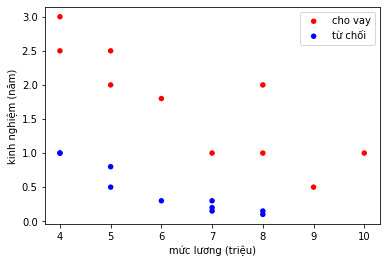

In [44]:
plt.scatter(x[yes_idx, 0], x[yes_idx, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[no_idx, 0], x[no_idx, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.show()

In [45]:
X = np.hstack((np.ones((N, 1)), x))
X

array([[ 1.  , 10.  ,  1.  ],
       [ 1.  ,  5.  ,  2.  ],
       [ 1.  ,  6.  ,  1.8 ],
       [ 1.  ,  7.  ,  1.  ],
       [ 1.  ,  8.  ,  2.  ],
       [ 1.  ,  9.  ,  0.5 ],
       [ 1.  ,  4.  ,  3.  ],
       [ 1.  ,  5.  ,  2.5 ],
       [ 1.  ,  8.  ,  1.  ],
       [ 1.  ,  4.  ,  2.5 ],
       [ 1.  ,  8.  ,  0.1 ],
       [ 1.  ,  7.  ,  0.15],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.8 ],
       [ 1.  ,  7.  ,  0.3 ],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.5 ],
       [ 1.  ,  6.  ,  0.3 ],
       [ 1.  ,  7.  ,  0.2 ],
       [ 1.  ,  8.  ,  0.15]])

In [46]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [49]:
def train(X, y, learning_rate, iteration, W):
    if W is None:
        W = np.random.rand(X.shape[1], 1)
    loss = np.zeros(iteration)
    stop = 0
    for i in range(1, iteration):
        y_pre = sigmoid(X @ W)
        loss[i] = -np.sum(y*np.log(y_pre) + (1-y)*np.log(1-y_pre))
        if abs(loss[i]-loss[i-1]) < 1e-6:
            stop = i
            break
        delta = X.T @ (y_pre - y)
        W = W - learning_rate*delta
        if i%10000 == 0:
            print(i, ':', loss[i])
    
    # plot loss
    x = np.arange(1, stop+1)
    y = loss[1:stop+1]
    
    plt.title("Loss by iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.plot(x, y, color ="red")
    plt.show()
    return W

Train lan 1

10000 : 0.496983888346163
20000 : 0.26553608599649986
30000 : 0.1822796437572493
40000 : 0.13912450394352102
50000 : 0.11264952011396756
60000 : 0.09472331646127155
70000 : 0.0817684869237445


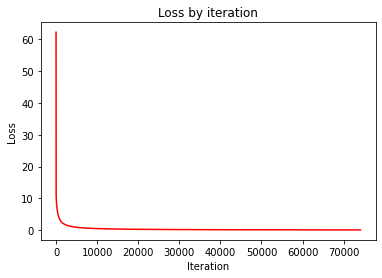

In [50]:
W = train(X, y, 0.01, 100000, None)

In [51]:
W

array([[-32.33065885],
       [  3.24260423],
       [ 13.9945079 ]])

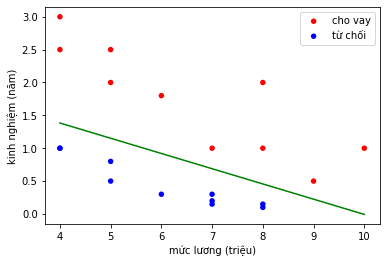

In [52]:
plt.scatter(x[yes_idx, 0], x[yes_idx, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[no_idx, 0], x[no_idx, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
t = 0.5
plt.plot((4, 10),(-(W[0]+4*W[1]+ np.log(1/t-1))/W[2], -(W[0] + 10*W[1]+ np.log(1/t-1))/W[2]), 'g')
plt.show()

In [53]:
test = np.array([1, 6, 1])
predict = sigmoid(test@W)
predict[0]

0.7538912180662253

p>0.5 -> cho vay